In [1]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt; plt.ioff()
import urllib.request
import json
import pandas as pd
import mlflow

In [2]:
def plot_and_save_history(url, path):
    webURL = urllib.request.urlopen(url)
    data = webURL.read()
    encoding = webURL.info().get_content_charset('utf-8')
    stats = json.loads(data.decode(encoding))

    stat_frame = pd.DataFrame(stats) 
    fig, ax = plt.subplots(figsize=(15,10)) 
    sns.lineplot(ax=ax, data=stat_frame.drop(['support'], axis=1), size=20) 
    fig.savefig(path) 
    
def update_mlflow_experiment(uuid, runtime_h):
    scores_url = f'http://deepsense-mlflow.openshift-prd.ov.otto.de/get-artifact?path=iterated_stats.json&run_uuid={uuid}'
    plot_and_save_history(scores_url, 'scores.png')
    with mlflow.start_run(run_uuid=uuid):
        mlflow.log_metric('runtime_h', runtime_h)
        mlflow.log_artifact('scores.png')

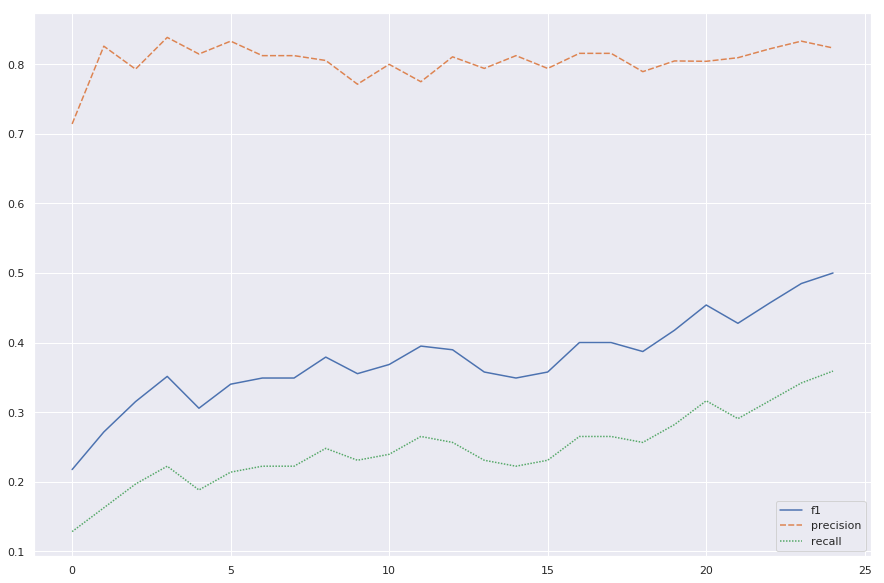

In [3]:
mlflow.set_tracking_uri('http://deepsense-mlflow.openshift-prd.ov.otto.de')
mlflow.set_experiment("NER_tagging_names_luk")

update_mlflow_experiment('bc14675843204ddcb8ed883f31a822ce', 13.1)
